In [1]:
import tensorflow as tf
from tensorflow.python.summary.summary_iterator import summary_iterator
import matplotlib.pyplot as plt

In [2]:
# Path to the event file
# first file in logs folder
path = "logs/events.out.tfevents.1690048183.a88c78a9dc8b.5545.1"

# Use TensorFlow's summary_iterator to extract data
summaries = []
for summary in summary_iterator(path):
    summaries.append(summary)

# Extract the keys (metric names) from the first summary that has a 'summary' field
keys = []
for summary in summaries:
    if summary.summary is not None:
        for value in summary.summary.value:
            if value.tag not in keys:
                keys.append(value.tag)

print(keys)


Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`
['Loss/loss', 'Loss/color_loss', 'Loss/eikonal_loss', 'Statistics/s_val', 'Statistics/cdf', 'Statistics/weight_max', 'Statistics/psnr']


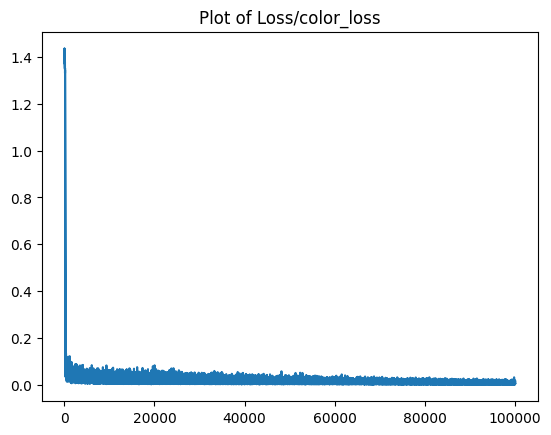

In [4]:


# Extract data for a specific key
key = "Loss/loss"
data = []
for summary in summaries:
    if summary.summary is not None:
        for value in summary.summary.value:
            if value.tag == key:
                data.append(value.simple_value)

# Plot the data
plt.plot(data)
plt.title('Plot of ' + key)
plt.show()
